# Phishing Classification

This analysis is based on data retrieved from XXX


Importing Packages.

In [1]:
# Import various key libraries for doing classification
import pandas as pd
import numpy as np

# data preprocessing
from sklearn import preprocessing

# exploratory analysis
import matplotlib.pyplot as plt
import mlxtend
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap
import seaborn as sns

# model fit
from sklearn.model_selection import train_test_split
import tensorflow as tf
# ignore warnings (libraries are rapidly changing)
import warnings
warnings.filterwarnings('ignore')

## Import data
Import the data the inspect the contents.

In [2]:
# Lets read the data start exploring to understand it.
# read data
data = pd.read_csv('dataset_small.csv', sep=',')

# print shape of df, number of countries, and time period covered
print('Shape of data: ', data.shape)
data.head()

Shape of data:  (58645, 112)


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,...,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,...,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,...,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,...,1,2,1,389,1,1,0,0,0,1


In [3]:
print('Columns: ', list(data.columns))

Columns:  ['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url', 'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url', 'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url', 'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url', 'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url', 'qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain', 'qty_slash_domain', 'qty_questionmark_domain', 'qty_equal_domain', 'qty_at_domain', 'qty_and_domain', 'qty_exclamation_domain', 'qty_space_domain', 'qty_tilde_domain', 'qty_comma_domain', 'qty_plus_domain', 'qty_asterisk_domain', 'qty_hashtag_domain', 'qty_dollar_domain', 'qty_percent_domain', 'qty_vowels_domain', 'domain_length', 'domain_in_ip', 'server_client_domain', 'qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory', 'qty_slash_directory', 'qty_questionmark_directory', 'qty_equal_directory', 'qty_at_directory', 'qty_and_directory', 'qty_exclamation_directory',

In [4]:
data.dtypes

qty_dot_url             int64
qty_hyphen_url          int64
qty_underline_url       int64
qty_slash_url           int64
qty_questionmark_url    int64
                        ...  
qty_redirects           int64
url_google_index        int64
domain_google_index     int64
url_shortened           int64
phishing                int64
Length: 112, dtype: object

## Data Characteristics

The data is labelled phishing data with URLs suspected of being phishing URLs labelled as 1 and regular URLs labelled a 0.  The data contains 111 features describing various characteristics of the URLs including the number of occurrences of various characteristics in the URLs.

Specific characters being tracked for occurrence in the URL and parts of URLs include dot '.', hyphen '-', underline '_', slash '/', questionmark '?' etc.

Other characteristics of URLs being tracked include length, occurance of IP address, time response, domain SPF, TTL, time of expiration, occurance of name servers and mx servers in the the route.



## Describe the data

We can describe the data using various summary statistics.

In [5]:
## Inspect and describe the data.
data.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,...,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,2.284338,0.457123,0.171285,1.937522,0.014102,0.311177,0.033456,0.212959,0.004451,0.001535,...,1.110666,2.829619,1.630113,5056.676272,0.501373,0.303419,0.001279,0.002234,0.008287,0.522585
std,1.473209,1.339340,0.801919,2.037525,0.138156,1.159198,0.343272,1.130323,0.107352,0.089320,...,0.912962,1.377018,1.719554,7102.853538,0.500002,0.815315,0.037599,0.047927,0.090657,0.499494
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,288.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,1191.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,9866.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,16.000000,20.000000,86400.000000,1.000000,17.000000,1.000000,1.000000,1.000000,1.000000


There are at total of 58645 observations.  Based on an initial review, we observe 4 type of data:

+ Counts (various qty_*)
+ Lengths (various length)
+ Time (seconds) i.e. TTL, Time Response
+ Presence (Y/N) i.e. TLS certificates, Google Index, Domain

it is clear that the count data and length data have skews based on underlying data occurrences and the time data is not on the same scale.  These are need to be normalized and standardized for input our ML algorithms.

## Understanding the Data
### Input variables
1. Qty features indicate the number of specific characters in each part of the URL
+ URL
+ Domain
+ Directory
+ File
+ Params
2. Length features indicate the length of the part or subpart of the URL
+ directory_length
+ params_length
+ domain_length
+ url_length
3. Time features that indicate time elapsed for certain actions
+ time_response
+ time_domain_activation
+ time_domain_expiration
+ ttl hostname
4. Presence features that indicate if some element is present or not.
+ url_google_index
+ domain_google_index
+ email in domain
+ url_shortened
+ tls_ssl_certificate
+ domain_spf
+ email_in_url

### Target variable
1. Phishing - 0 normal url, 1 phishing url

In [6]:
data.phishing.value_counts()

phishing
1    30647
0    27998
Name: count, dtype: int64

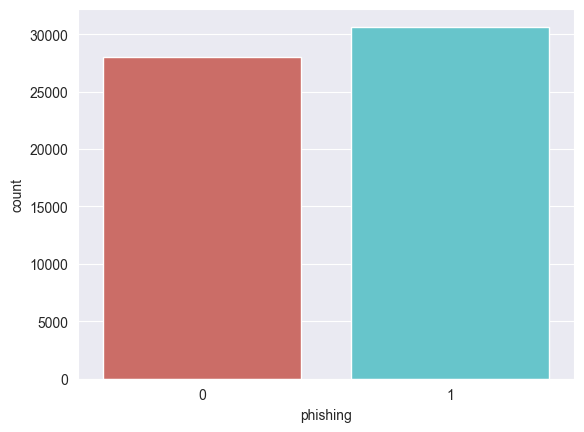

In [7]:
sns.countplot(x='phishing',data=data,palette='hls')
plt.show()

In [9]:
## Data Summarization
data.groupby('phishing').mean()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
phishing,,,,,,,,,,,,,,,,,,,,,
0,2.067719,0.259840,0.044789,0.661619,0.000393,0.049111,0.000071,0.024502,0.001786,0.000000,...,379.129724,1.121866,3.024395,1.711694,4034.522609,0.523109,0.332024,0.001929,0.002393,0.000321
1,2.482233,0.637354,0.286847,3.103142,0.026626,0.550592,0.063954,0.385127,0.006885,0.002937,...,215.491957,1.100434,2.651679,1.555585,5990.479199,0.481515,0.277287,0.000685,0.002088,0.015564


**Observation**

1. asterisk, hashtag, dollar are all not in normal URLs and only in Phishing URLs
2. phishing URLs tend to be much longer
3. slash, question, equal, and, exclamation, space, tilde, comma, plus, asterisk, hash, dollar, percent are not valid character for domain in either category.  These features can be dropped
4. Need to understand what `-` means in directory
5. directory_length is much longer for phishing sites
6. file_length is much longer for phishing sites
7. params_length much longer for phishing sites
8. time_domain_activation is much shorter for phishing sites
9. time_domain_expiration is much shorter for phishing sites


In [10]:
### Lets get our Data and Target Variable Separated
data_x = data.drop('phishing', axis=1)
y = data['phishing']

print("X Shape:", data_x.shape)
print("y Shape:", y.shape)

X Shape: (58645, 111)
y Shape: (58645,)


In [11]:
### Standardize the Data
### We will standardize the training data by itself and the test data by itself so that we don't introduct any inadvertent information / biases in the model training
### So let's separate first before we do the training and feature identification

from sklearn.preprocessing import StandardScaler
### Let's create the Training Set before we do any standardization or normalization.
### Let's do a 70/30 split on test v. train
X_train,X_test,y_train,y_test = train_test_split(data_x,y, test_size = 0.3, shuffle=True, random_state=24)

### Standardize the training and and test data separately.
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

print("X_train Shape:", X_train_std.shape)
print("y_train  Shape:", y_train.shape)

print("X_test Shape:", X_test_std.shape)
print("y_test  Shape:", y_test.shape)

X_train Shape: (41051, 111)
y_train  Shape: (41051,)
X_test Shape: (17594, 111)
y_test  Shape: (17594,)


In [13]:
### Let's do feature selection based on RFE (Recursive Feature Elimination)
### using logistic regression.  RFE = 30 features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg,n_features_to_select=30)
rfe = rfe.fit(X_train_std,y_train)
Selected_Features_Support = list(rfe.support_)
Selected_Features_rank = list(rfe.ranking_)

In [25]:
### Let's see what's been selected as features in sorted rank order
Features = data_x.columns.tolist()
Selected_Features = np.column_stack((Features,Selected_Features_Support,Selected_Features_rank))
Selected_Features_df = pd.DataFrame(Selected_Features,columns=['Feature','Selected','Rank'])
Selected_Features_df['Rank'] = Selected_Features_df['Rank'].astype(int)
Selected_Features_df = Selected_Features_df.sort_values('Rank')
Selected_Features_df

,Feature,Selected,Rank
0,qty_dot_url,True,1
43,qty_slash_directory,True,1
45,qty_equal_directory,True,1
47,qty_and_directory,True,1
48,qty_exclamation_directory,True,1
...,...,...,...
32,qty_asterisk_domain,False,78
26,qty_and_domain,False,79
27,qty_exclamation_domain,False,80
34,qty_dollar_domain,False,81


In [26]:
# Working with Numpy
selected_idx = Selected_Features[:, 1] == 'True'
final_selection = Selected_Features[selected_idx,0]
#final_selection = np.append(final_selection, 'directory_length')
print(final_selection)


['qty_dot_url' 'qty_underline_url' 'qty_at_url' 'qty_asterisk_url'
 'qty_percent_url' 'length_url' 'qty_dot_domain' 'qty_dot_directory'
 'qty_hyphen_directory' 'qty_slash_directory' 'qty_equal_directory'
 'qty_and_directory' 'qty_exclamation_directory' 'qty_comma_directory'
 'qty_plus_directory' 'qty_equal_file' 'qty_tilde_file' 'qty_comma_file'
 'qty_plus_file' 'qty_underline_params' 'qty_questionmark_params'
 'qty_equal_params' 'qty_and_params' 'qty_space_params' 'qty_comma_params'
 'qty_hashtag_params' 'tld_present_params' 'qty_params' 'email_in_url'
 'time_domain_activation']


## Model Implementation
### Logistic Regression (30 Features)
Let's do a Test v. Train of 70% v 30%


In [42]:
final_selection

array(['qty_at_url', 'qty_asterisk_url', 'length_url', 'qty_dot_domain',
       'qty_dot_directory', 'qty_slash_directory', 'qty_equal_directory',
       'qty_exclamation_directory', 'qty_comma_directory',
       'qty_tilde_file', 'qty_comma_file', 'qty_questionmark_params',
       'qty_equal_params', 'qty_and_params', 'qty_hashtag_params',
       'tld_present_params', 'qty_params', 'time_domain_activation'],
      dtype='<U26')

In [38]:
### Lets Do a Logistic Regression
X = data_x[final_selection]
logreg = LogisticRegression()
logreg.fit(X_train_std[final_selection], y_train)

## Calculating the accuracy
print('Accuracy of logistic regression classifier on test set: {:2f}'.format(logreg.score(X_test_std[final_selection],y_test)))

IndexError: arrays used as indices must be of integer (or boolean) type

In [29]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits = 10)

modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train_std,y_train, cv = kfold, scoring = scoring)
print("10-fold cross-validation average accuracy : %.3f" % (results.mean()))

10-fold cross-validation average accuracy : 0.900


In [30]:
from sklearn.metrics import confusion_matrix
y_pred = logreg.predict(X_test_std)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7505  847]
 [ 925 8317]]


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      8352
           1       0.91      0.90      0.90      9242

    accuracy                           0.90     17594
   macro avg       0.90      0.90      0.90     17594
weighted avg       0.90      0.90      0.90     17594



With 30 features for Logistic regression determined by RFE (Recursive Feature Elimination) here are the results:

Thus, True Positive = 7215, False Positive = 826, True Negative = 8416, False Negative = 1137

Precision = TP/(TP+FP) = 88% for  phishing URLS

Recall = TP/(TP+FN) = 91% for phishing URLs

F score = 2 * (Precision * Recall)/(Precision + Recall)

Accuracy = 89%

In [33]:
### Let's do feature selection based on RFE (Recursive Feature Elimination)
### using logistic regression. RFE = 18 features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=18)
rfe = rfe.fit(X_train_std, y_train)
Selected_Features_Support = list(rfe.support_)
Selected_Features_rank = list(rfe.ranking_)

In [34]:
Features = data_x.columns.tolist()
Selected_Features = np.column_stack((Features, Selected_Features_Support, Selected_Features_rank))
Selected_Features_df = pd.DataFrame(Selected_Features,columns=['Feature','Selected','Rank'])
Selected_Features_df['Rank'] = Selected_Features_df['Rank'].astype(int)
Selected_Features_df = Selected_Features_df.sort_values('Rank')
Selected_Features_df

,Feature,Selected,Rank
40,qty_dot_directory,True,1
68,qty_tilde_file,True,1
19,qty_dot_domain,True,1
18,length_url,True,1
69,qty_comma_file,True,1
...,...,...,...
32,qty_asterisk_domain,False,90
26,qty_and_domain,False,91
27,qty_exclamation_domain,False,92
34,qty_dollar_domain,False,93


In [35]:
selected_idx = Selected_Features[:, 1] == 'True'
final_selection = Selected_Features[selected_idx,0]
print(final_selection)

['qty_at_url' 'qty_asterisk_url' 'length_url' 'qty_dot_domain'
 'qty_dot_directory' 'qty_slash_directory' 'qty_equal_directory'
 'qty_exclamation_directory' 'qty_comma_directory' 'qty_tilde_file'
 'qty_comma_file' 'qty_questionmark_params' 'qty_equal_params'
 'qty_and_params' 'qty_hashtag_params' 'tld_present_params' 'qty_params'
 'time_domain_activation']


### Logistic Regression (18 Features)
Let's do a Test v. Train of 70% v 30%


In [23]:
logreg = LogisticRegression()
logreg.fit(X_train_std, y_train)

## Calculating the accuracy
print('Accuracy of logistic regression classifier on test set: {:2f}'.format(logreg.score(X_test,y_test)))

Accuracy of logistic regression classifier on test set: 0.919853


In [24]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits = 10)

modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train,y_train, cv = kfold, scoring = scoring)
print("10-fold cross-validation average accuracy : %.3f" % (results.mean()))

10-fold cross-validation average accuracy : 0.920


In [25]:
from sklearn.metrics import confusion_matrix
y_pred = logreg.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10670   852]
 [  569  5639]]


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     11522
           1       0.87      0.91      0.89      6208

    accuracy                           0.92     17730
   macro avg       0.91      0.92      0.91     17730
weighted avg       0.92      0.92      0.92     17730



With 18 features for Logistic regression determined by RFE (Recursive Feature Elimination) here are the results:

Thus, True Positive = 7074, False Positive = 827, True Negative = 8415, False Negative = 1278

Precision = TP/(TP+FP) = 87% for  phishing URLS

Recall = TP/(TP+FN) = 91% for phishing URLs

F score = 2 * (Precision * Recall)/(Precision + Recall) = 89%

Accuracy = 88%

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt = DecisionTreeClassifier(criterion="entropy",min_samples_split=10, max_depth=5)
dt.fit(X_train,y_train)
print ('Accuracy:', dt.score(X_test, y_test))

Accuracy: 0.9134799774393683


In [28]:
from sklearn.metrics import confusion_matrix

y_pred = dt.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10702   820]
 [  714  5494]]


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     11522
           1       0.87      0.88      0.88      6208

    accuracy                           0.91     17730
   macro avg       0.90      0.91      0.91     17730
weighted avg       0.91      0.91      0.91     17730



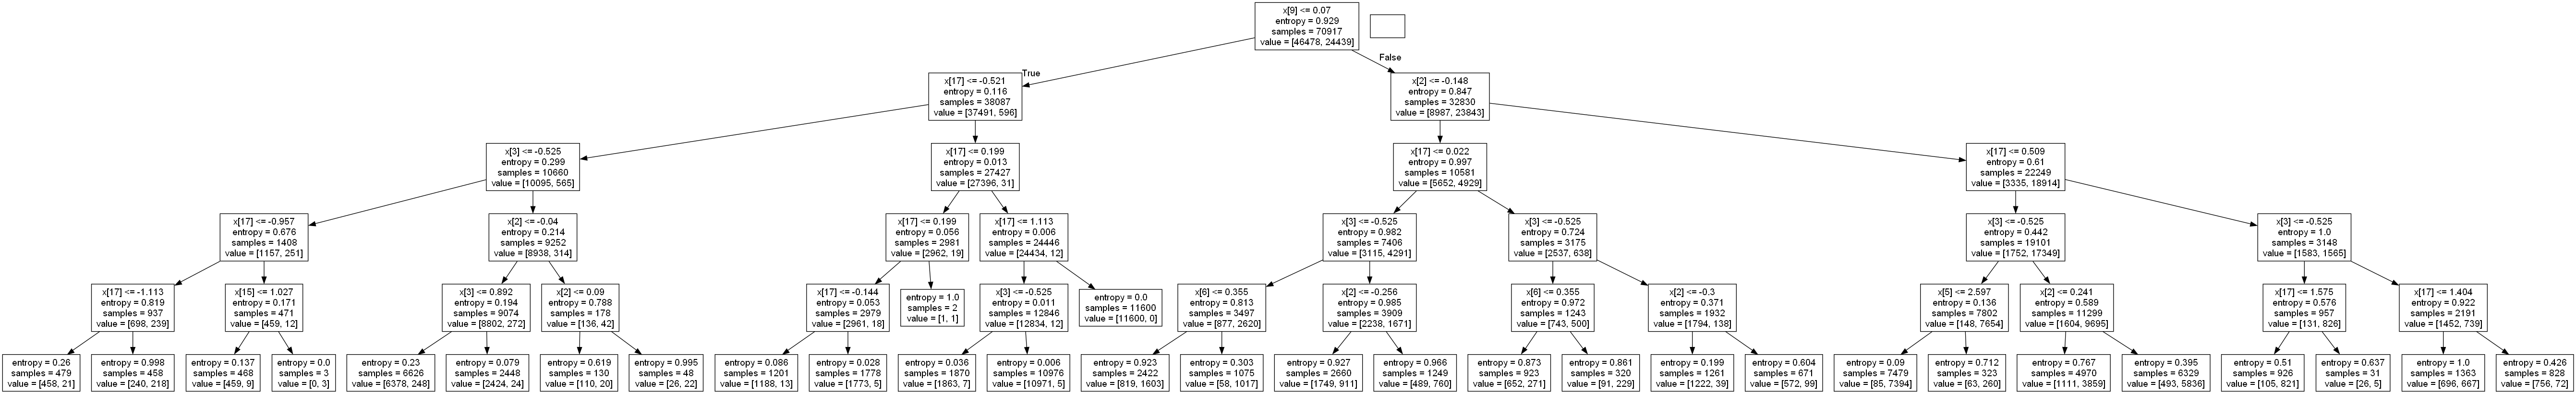

In [30]:
import graphviz
import pydotplus
from IPython.display import Image
import os
# For Windows machines, temporarily adjust PATH if necessary to use graphviz
os.environ['PATH'] = os.environ['PATH']+r";C:\Program Files\Graphviz\bin"

dot_data = tree.export_graphviz(dt, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt = DecisionTreeClassifier(criterion="entropy",min_samples_split=10, max_depth=10)
dt.fit(X_train,y_train)
print ('Accuracy:', dt.score(X_test, y_test))

Accuracy: 0.9332769317540891


In [32]:
from sklearn.metrics import confusion_matrix

y_pred = dt.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10813   709]
 [  474  5734]]


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     11522
           1       0.89      0.92      0.91      6208

    accuracy                           0.93     17730
   macro avg       0.92      0.93      0.93     17730
weighted avg       0.93      0.93      0.93     17730



In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
print ('Accuracy:', knn.score(X_test, y_test))

Accuracy: 0.9222786238014664


In [35]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[11120   402]
 [  976  5232]]


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11522
           1       0.93      0.84      0.88      6208

    accuracy                           0.92     17730
   macro avg       0.92      0.90      0.91     17730
weighted avg       0.92      0.92      0.92     17730

